In [2]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [3]:
from os import listdir
from os.path import isfile, join

In [4]:
results_path = './results1/'
result_files = [f for f in listdir(results_path) if isfile(join(results_path, f)) and f[-7:]=="new.txt"]

In [5]:
results = []
for result_file in result_files: #listdir(results_path):
    result_arr = []
    with open(join(results_path, result_file), 'r') as fin:
        for line in fin:
            result_arr.append(line.strip().split("\t")[-1].split(" "))
    results.append(result_arr)

In [6]:
idx_diff_projnorm_start = 0
idx_diff_projnorm_list = range(idx_diff_projnorm_start, 60, 6)

idx_weight1_projnorm_start = 1
idx_weight1_projnorm_list = range(idx_weight1_projnorm_start, 60, 6)

idx_weight2_projnorm_start = 2
idx_weight2_projnorm_list = range(idx_weight2_projnorm_start, 60, 6)

idx_diff_norm_start = 3
idx_diff_norm_list = range(idx_diff_norm_start, 60, 6)

idx_weight1_norm_start = 4
idx_weight1_norm_list = range(idx_weight1_norm_start, 60, 6)

idx_weight2_norm_start = 5
idx_weight2_norm_list = range(idx_weight2_norm_start, 60, 6)


In [7]:
all_results = []
for i in range(len(results)):
    x_arr = []
    y_arr = []
    for j in range(len(results[i])):
        norm_results = list(map(float, results[i][j]))
        x_arr.append(10 * (1+j))
        projnorm = np.linalg.norm([list(map(float, results[i][j]))[k] for k in idx_diff_projnorm_list], ord=1)
        totalnorm = np.linalg.norm([list(map(float, results[i][j]))[k] for k in idx_diff_norm_list], ord=1)
        y_arr.append(projnorm / totalnorm * 1)
    all_results.append([x_arr, y_arr])

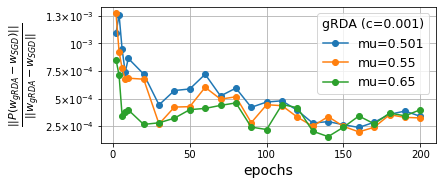

In [8]:
fig, axs = plt.subplots(1, 1)

fig.set_figheight(2.5)
fig.set_figwidth(6)

axs_sub = axs
x_arr = [2,4,6,8] + list(range(10,201,10))

a, = axs_sub.plot(x_arr, np.sqrt(all_results[0][1]), marker='o')
b, = axs_sub.plot(x_arr, np.sqrt(all_results[1][1]), marker='o')
d, = axs_sub.plot(x_arr, np.sqrt(all_results[3][1]), marker='o')

axs_sub.set_ylabel(r'$\frac{||P(w_{gRDA}-w_{SGD})||}{||w_{gRDA}-w_{SGD}||}$', fontsize=16)# '+r'(*$10^{-3}$)')
axs_sub.set_xlabel('epochs', fontsize=14)
# axs_sub.set_xlim(0,200)
axs_sub.grid(True)


plt.rc('legend', fontsize=12.5)    # legend fontsize
import matplotlib.ticker as mticker
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.1e' % x))
axs.yaxis.set_major_formatter(mticker.FuncFormatter(g))
plt.rcParams.update({'font.size': 12.5})
axs.legend([a,b,d],["mu=0.501", "mu=0.55", "mu=0.65"], loc='upper right', title="gRDA (c=0.001)", fontsize=12.5)


plt.savefig(results_path+"projection_diff_fraction_fullbatch_remove-mu06.pdf", bbox_inches='tight')
